In [1]:
! pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [2]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/My Drive')
model = tf.keras.models.load_model('saved_modelo4aux/my_model')

# Check its architecture
model.summary()
os.chdir('..')
os.chdir('..')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 36, 44, 24)        1200      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 144)              

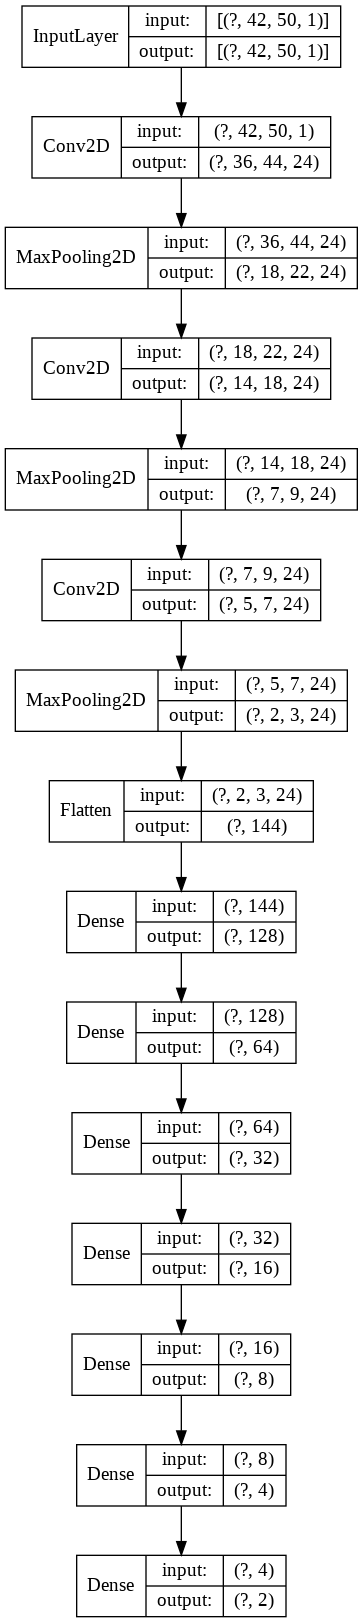

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False,)

In [ ]:
for layer in model.layers[6:]:
    layer.trainable = True
for layer in model.layers[:6]:
    layer.trainable = False

for i in range(1,7):
  model.pop()

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))                                                                       
model.add(Dense(16, activation='relu'))  
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 36, 44, 24)        1200      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 144)              

In [ ]:
# Importante Falta normalizar los datos
x_train=np.load('/content/drive/My Drive/tesis aux/xtrain2.npy')
y_train=np.load('/content/drive/My Drive/tesis aux/ytrain2.npy')
x_test=np.load('/content/drive/My Drive/tesis aux/xvalid2.npy')
y_test=np.load('/content/drive/My Drive/tesis aux/yvalid2.npy')

In [5]:
# Mis datos, ya estan normalizados
x_train=np.load('/content/drive/My Drive/tesis aux/ojo2_train.npy')
y_train=np.load('/content/drive/My Drive/tesis aux/label2_train.npy')
x_test=np.load('/content/drive/My Drive/tesis aux/ojo2_valid.npy')
y_test=np.load('/content/drive/My Drive/tesis aux/label2_valid.npy')

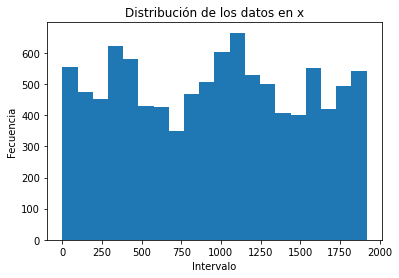

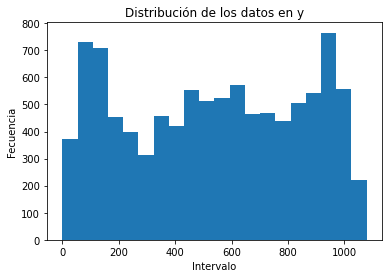

In [93]:
plt.hist(y_test[:,0],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Distribución de los datos en x')
plt.show()


plt.hist(y_test[:,1],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Distribución de los datos en y')
plt.show()

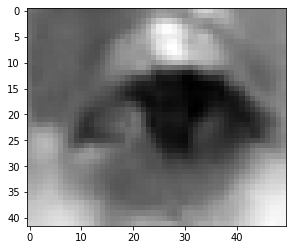

In [6]:
# Correr esto 
#byw
import cv2
bas=x_train.shape[0]
byw=[]
for i in range(bas):
  image=x_train[i,:,:]
  gray=cv2.resize(image,(50,42))
  byw.append(gray)
byw=np.reshape(byw,(bas, 42, 50,1))

bas=x_test.shape[0]
bywt=[]
for i in range(bas):
  image=x_test[i,:,:]
  gray=cv2.resize(image,(50,42))
  bywt.append(gray)
bywt=np.reshape(bywt,(bas, 42, 50, 1))
plt.imshow(byw[-1,:,:,0],cmap='gray')

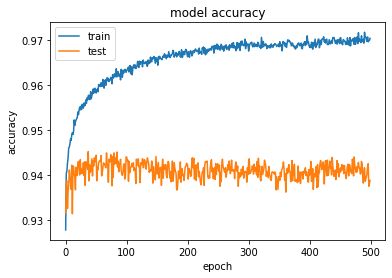

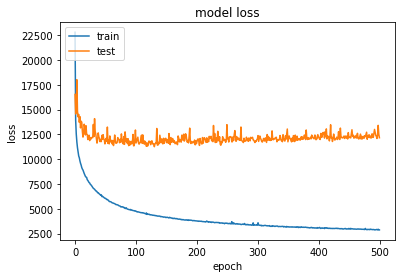

312/312 [==============================] - 1s 2ms/step - loss: 12156.1797 - accuracy: 0.9388


In [ ]:

#Correr esto y descargar
with tf.device('/device:GPU:0'):
#lista=[1]
#for i in lista:
  model_ck=tf.keras.callbacks.ModelCheckpoint(filepath='mejorcito.hdf5', save_weights_only=False,monitor='val_accuracy', save_best_only=True) 
  history=model.fit(byw, y_train, batch_size = 8, epochs=500, verbose=0,validation_data=(bywt, y_test),callbacks=[model_ck])
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  mse, test_acc = model.evaluate(bywt, y_test, verbose = 1)

In [ ]:
while True:
  z=0

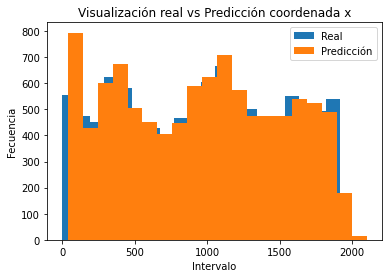

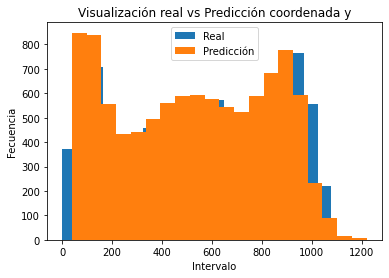

In [ ]:
plt.hist(y_test[:,0],bins=20)
plt.hist(model.predict(bywt)[:,0],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Visualización real vs Predicción coordenada x')
plt.legend(['Real','Predicción'])
plt.show()


plt.hist(y_test[:,1],bins=20)
plt.hist(model.predict(bywt)[:,1],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Visualización real vs Predicción coordenada y')
plt.legend(['Real','Predicción'])
plt.show()

In [ ]:
print(np.mean(np.abs(model.predict(bywt)[:,1]-y_test[:,1])))
print(np.mean(np.abs(model.predict(bywt)[:,0]-y_test[:,0])))

70.02131217183432
81.48346993487549


In [ ]:
print(np.mean(np.abs(model.predict(byw)[:,1]-y_train[:,1])))
print(np.mean(np.abs(model.predict(byw)[:,0]-y_train[:,0])))

37.91469168178588
40.201946441750025


In [ ]:
#0.6882
pred=model.predict(bywt)
print(np.mean(np.abs(model.predict(bywt)[:,1])-np.abs(y_test[:,1])))
print(np.mean(np.abs(model.predict(bywt)[:,0])-np.abs(y_test[:,0])))
print(np.mean(pred)-np.mean(y_test))
#print(model.predict(bywt[10:15]))
#print(y_test[10:15])

-290.8141276740091
-577.3076349881461
-434.06087823710845


In [ ]:
print(y_test)
print(pred)

[[1713.  844.]
 [ 189.   97.]
 [1431.  570.]
 ...
 [ 956.  832.]
 [1537.  985.]
 [1104.   31.]]
[[635.5314   168.1511  ]
 [140.89037  113.809715]
 [544.603    357.2802  ]
 ...
 [425.51376  315.23767 ]
 [589.67993  407.63925 ]
 [453.0897   248.69528 ]]


In [ ]:
os.chdir('/content/drive/My Drive')
# Save the entire model as a SavedModel.
#!rm -dfr saved_modelo2aux
!mkdir -p saved_modelo3aux
model.save('saved_modelo3aux/my_model')

# my_model directory
!ls saved_modelo3aux

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_modelo3aux/my_model
os.chdir('..')
os.chdir('..') 

NameError: ignored

In [ ]:
np.mean(y_test)

744.3420366843741

In [ ]:
def normaliz(mat):
  si=mat.shape
  for i in range(si[0]):
    for j in range(si[1]):
      mat[i,j,:,:]=mat[i,j,:,:]/255.0
  return mat
x_train=normaliz(x_train)
x_test=normaliz(x_test)

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
os.chdir('/content/drive/My Drive')
model = tf.keras.models.load_model('saved_modelo2/my_model')

# Check its architecture
model.summary()
os.chdir('..')
os.chdir('..')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 44, 24)        3552      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 3, 24)          0

In [ ]:
with tf.device('/device:GPU:0'):
  history=model.fit(x_train, y_train, batch_size = 512, epochs=3000, verbose=0,validation_data=(x_test[0:100], y_test[0:100]))
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  mse, test_acc = model.evaluate(x_test, y_test, verbose = 1)

In [ ]:
os.chdir('/content/drive/My Drive')
# Save the entire model as a SavedModel.
!rm -dfr saved_modelo2
!mkdir -p saved_modelobywd2
model.save('saved_modelobywd2/my_model')

# my_model directory
!ls saved_modelobywd2

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_modelobywd2/my_model
os.chdir('..')
os.chdir('..') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_modelobywd2/my_model/assets
my_model
assets	saved_model.pb	variables


In [ ]:
with tf.device('/device:GPU:0'):

  model = Sequential()
  model.add(Conv2D(24, kernel_size=(7, 7),activation='relu',input_shape=(42,50,3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.15))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(2))
  optimizer = keras.optimizers.Adam()
  peldel=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")


  model.compile(loss=peldel,optimizer=optimizer,metrics=['accuracy'])
  model.summary()
  model.fit(x_train[0:1000], y_train[0:1000], batch_size = 64, epochs=10, verbose= 1,validation_data=(x_test[0:150], y_test[0:150]))
  mse, test_acc = model.evaluate(x_test, y_test, verbose = 1)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 44, 24)        3552      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 3, 24)          0

In [ ]:
import sklearn.metrics as metrics
yfake=model.predict(x_test)
metrics.mean_squared_error(y_test, yfake)
print('El error cuadrático medio del modelo es: ',model.evaluate(x_test,y_test,verbose=0)[0])
print('La precisión del modelo es: ',model.evaluate(x_test,y_test,verbose=0)[1])

In [ ]:
plt.hist(y_test[:,0],bins=20)
plt.hist(model.predict(x_test)[:,0],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Visualización real vs Predicción coordenada x')
plt.legend(['Real','Predicción'])

In [ ]:
plt.hist(y_test[:,1],bins=20)
plt.hist(model.predict(x_test)[:,1],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Visualización real vs Predicción coordenada y')
plt.legend(['Real','Predicción'])

In [ ]:
import cv2
bas=x_train.shape[0]
byw=[]
for i in range(bas):
  image=x_train[i,:,:,:]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  byw.append(gray)
byw=np.reshape(byw,(149461, 42, 50,1))/255

bas=x_test.shape[0]
bywt=[]
for i in range(bas):
  image=x_test[i,:,:,:]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  bywt.append(gray)
bywt=np.reshape(bywt,(32028, 42, 50, 1))/255

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 44, 24)        1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0

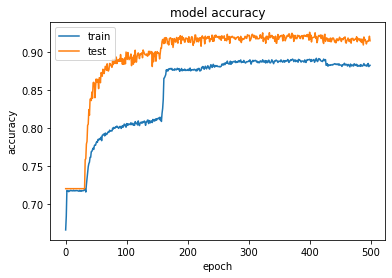

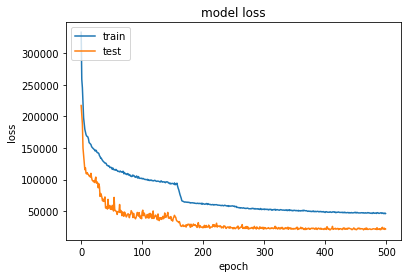

312/312 [==============================] - 1s 2ms/step - loss: 22021.9668 - accuracy: 0.9143


In [ ]:
with tf.device('/device:GPU:0'):

  model = Sequential()
  model.add(Conv2D(24, kernel_size=(7, 7),activation='relu',input_shape=(42,50,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.1))
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(4, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(2))
  optimizer = keras.optimizers.Adam()
  peldel=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

  model.compile(loss=peldel,optimizer=optimizer,metrics=['accuracy'])
  model.summary()
  history=model.fit(byw, y_train, batch_size = 64, epochs=500, verbose=0,validation_data=(bywt,y_test))

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()  
  mse, test_acc = model.evaluate(bywt, y_test, verbose = 1)

In [ ]:
print(model.predict(bywt[10:15]))
print(y_test[10:15])


[[1027.1406   484.43457]
 [1145.2275   666.56244]
 [ 329.7344   200.39795]
 [ 868.55383  152.77377]
 [1769.6355   270.05005]]
[[ 864.  400.]
 [ 950.  497.]
 [ 607.   98.]
 [ 665.  216.]
 [1843.  110.]]


In [7]:
  mse, test_acc = model.evaluate(bywt, y_test, verbose = 1)

312/312 [==============================] - 1s 3ms/step - loss: 12156.1826 - accuracy: 0.9388


In [20]:
total_error = tf.reduce_sum(tf.square(tf.subtract(y_test, tf.reduce_mean(y_test))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y_test, model.predict(bywt))))
R_squared = tf.subtract(1, tf.divide(unexplained_error, total_error))
print(R_squared)

tf.Tensor(0.9507677437547478, shape=(), dtype=float64)


In [83]:
su=tf.keras.losses.MAPE(y_test, model.predict(bywt))

In [81]:
model.predict(bywt)[:,0]

array([1795.185 ,  166.8812, 1397.5197, ..., 1034.5793, 1339.4775,
       1061.8586], dtype=float32)

In [92]:
1-np.mean(abs(y_test-model.predict(bywt))/1980,axis=0)

array([0.95884669, 0.96463574])

In [62]:
su=(abs(y_test-model.predict(bywt)))

In [63]:
aver=su/(y_test)-0.000001

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [64]:
np.sum(aver,axis=0)/np.shape(aver)[0]

array([inf, inf])

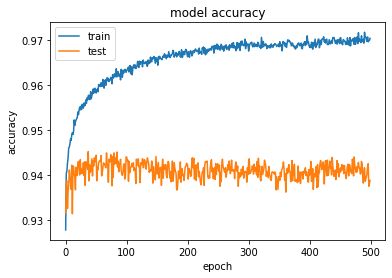

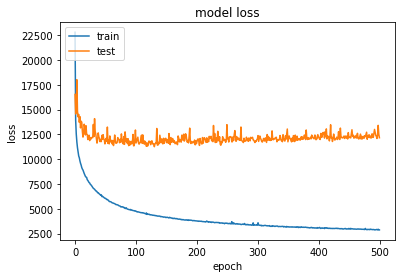

312/312 [==============================] - 1s 2ms/step - loss: 12156.1797 - accuracy: 0.9388


In [ ]:

#Correr esto y descargar
with tf.device('/device:GPU:0'):
#lista=[1]
#for i in lista:
  model_ck=tf.keras.callbacks.ModelCheckpoint(filepath='mejorcito.hdf5', save_weights_only=False,monitor='val_accuracy', save_best_only=True) 
  history=model.fit(byw, y_train, batch_size = 8, epochs=500, verbose=0,validation_data=(bywt, y_test),callbacks=[model_ck])
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  mse, test_acc = model.evaluate(bywt, y_test, verbose = 1)